## 1. Packages and Functions

### Import packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from keras.utils.np_utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import datetime

### Functions

## 2. Preparing data

### Importing dataset

In [3]:
# import dataset from github
df = pd.read_csv('https://raw.githubusercontent.com/ifood/ifood-data-business-analyst-test/master/ml_project1_data.csv',
                 sep=',')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


Notes:
Shape (2240, 29)
Num_Columns_Numerical = 27
Num_Columns_Categorical = 2

###  Preprocessing

In [4]:
df = df.dropna() # removes rows with NaN value e.g. Income column
df.groupby('Education').mean()['Income']

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

Notes:
Was not clear if 2n Cycle was a type of graduation or high school. So, a analysis of Income for each category was made. Based on results 2n Cycle was the second lowest income, so can be presumed that 2n Cycle corresponds to High school, not a pos-graduation

Reference of 2nCycle graduation:

In [5]:
df_pp = df.copy()
display(df_pp['Education'].value_counts())
display(df_pp['Marital_Status'].value_counts())

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Notes:
With the goal to perform better exploratory analysis and predictions, it is necessary to convert columns Dt_customer (Date string), Education (Categorical ordinal), Marital_Status (Categorical nominal) to numeric representation


In [6]:
from sklearn.preprocessing import OrdinalEncoder


# Categorizando coluna Education seguindo uma ordem de hierarquia crescente (Basic (0) -> PhD (4))
categories = [['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']]
ordinalEncoder = OrdinalEncoder(categories=categories)
df_pp['Education_Cat'] = ordinalEncoder.fit_transform(df_pp['Education'].values.reshape(-1, 1))
df_pp['Education_Cat'] = df_pp['Education_Cat'].astype(int)


Notes:
The OrdinalEncoder was used because the Education column has ordinal categories (categories has a hierarchy between them)
Basic, 2n Cycle, Graduation, Master, PhD will recieve a value (weight) of 0, 1, 2, 3, 4, respectively

In [7]:
# Categorizando coluna Marital Status utilizando get_dummies, já que a ordem das categorias não é importante
df_pp = pd.get_dummies(df_pp, columns=['Marital_Status'], prefix=['Marital_Type'])
df_pp['Marital_Status'] = df['Marital_Status']


Notes:
get_dummies was used because Marital_Status does not have hierarchy between them (nominal categories). Each category will recieve its own column

#### Convert datetime to numerical

Transforming date column to number

In [8]:
df_pp['Dt_Customer_Number'] = df_pp['Dt_Customer'].apply(lambda x: int(round(datetime.datetime.strptime(x, '%Y-%m-%d').timestamp())))

df after all pre processings:

In [9]:
df_pp
# oi =

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Marital_Type_Absurd,Marital_Type_Alone,Marital_Type_Divorced,Marital_Type_Married,Marital_Type_Single,Marital_Type_Together,Marital_Type_Widow,Marital_Type_YOLO,Marital_Status,Dt_Customer_Number
0,5524,1957,Graduation,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,1,0,0,0,Single,1346727600
1,2174,1954,Graduation,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,1,0,0,0,Single,1394247600
2,4141,1965,Graduation,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,1,0,0,Together,1377054000
3,6182,1984,Graduation,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,1,0,0,Together,1392001200
4,5324,1981,PhD,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,1,0,0,0,0,Married,1390100400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,1,0,0,0,0,Married,1371092400
2236,4001,1946,PhD,64014.0,2,1,2014-06-10,56,406,0,...,0,0,0,0,0,1,0,0,Together,1402369200
2237,7270,1981,Graduation,56981.0,0,0,2014-01-25,91,908,48,...,0,0,1,0,0,0,0,0,Divorced,1390618800
2238,8235,1956,Master,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,1,0,0,Together,1390532400


Notes:
9 columns was added due to the numericalization of columns Education and Marital Status

## 3. Exploratory Analysis
Notes:
1. shape = (2240,29)
2. Income has NaN values
3. Categorical Ordinal features: Education
4. Categorical Nominal features: Martial_Status
5. Numerical data: All other features



### 3.1. Analyzing 10 samples (5 with target = 1 and 5 with target = 0)
Objective: find nice features and bad features and insights about future analysis

In [10]:
# # df_plus_age = df_pp.copy()
# df_plus_age['Age'] = df_pp.apply(lambda x: 2014 - x['Year_Birth'], axis=1)
# samples = df_plus_age.sort_values(by=['Response'], ascending=False).groupby('Response').head(5)
# # samples
samples = df_pp.sort_values(by=['Response'], ascending=False).groupby('Response').head(5)
samples

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Marital_Type_Absurd,Marital_Type_Alone,Marital_Type_Divorced,Marital_Type_Married,Marital_Type_Single,Marital_Type_Together,Marital_Type_Widow,Marital_Type_YOLO,Marital_Status,Dt_Customer_Number
0,5524,1957,Graduation,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,1,0,0,0,Single,1346727600
1084,6072,1970,Master,75345.0,0,0,2013-02-02,16,918,57,...,0,0,0,0,1,0,0,0,Single,1359774000
1000,10473,1956,PhD,78028.0,0,1,2012-09-10,38,158,19,...,0,0,0,0,0,0,1,0,Widow,1347246000
1001,7962,1987,PhD,95169.0,0,0,2013-10-09,1,1285,21,...,0,0,0,0,1,0,0,0,Single,1381287600
1002,9984,1981,2n Cycle,56337.0,1,1,2013-03-27,25,349,16,...,0,0,0,1,0,0,0,0,Married,1364353200
1580,3790,1956,Graduation,34633.0,2,1,2014-01-23,31,8,1,...,0,0,0,0,0,1,0,0,Together,1390446000
1728,1000,1961,Master,74881.0,1,1,2013-03-08,48,505,72,...,0,0,0,0,0,1,0,0,Together,1362711600
1587,2471,1965,Graduation,61482.0,0,0,2014-06-27,39,48,58,...,0,0,0,1,0,0,0,0,Married,1403838000
1729,3828,1951,Graduation,71107.0,0,1,2013-02-17,61,533,10,...,0,0,0,1,0,0,0,0,Married,1361070000
114,9215,1980,PhD,43974.0,1,0,2012-12-12,19,378,0,...,0,0,0,1,0,0,0,0,Married,1355281200


Notes (Initial hypotheses):
- Columns correlated to Response: MntFruits,Meat,Fish,Hold; NumWebPurchases,CatalogPurchases; Education; Marital_Status
- Only 2 negative customers accepted the Campaign2
- None insight was found with positive customers related to older Campaigns at moment

### 3.2 Lets see the statistics about data

In [11]:
df_pp.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Cat,Marital_Type_Absurd,Marital_Type_Alone,Marital_Type_Divorced,Marital_Type_Married,Marital_Type_Single,Marital_Type_Together,Marital_Type_Widow,Marital_Type_YOLO,Dt_Customer_Number
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,2.459838,0.000903,0.001354,0.104693,0.386733,0.212545,0.258574,0.034296,0.000903,1.373467e+09
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,1.004825,0.030035,0.036777,0.306227,0.487112,0.409201,0.437950,0.182030,0.030035,1.749036e+07
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.343617e+09
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.358305e+09
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.373296e+09
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.388459e+09
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.404011e+09


Notes:
Study about describe() func


### 3.3 Lets see the balancement of the dataset

In [12]:
df_pp['Response'].value_counts()

0    1883
1     333
Name: Response, dtype: int64

Notes:
- The dataset is imbalanced
- Percentage of customers that responded to campaign: 15%
- Percentage of customers that not responded to campaign: 85%
- Therefore, can be presumed that future machine learning models will be better at predicting a customer that WILL NOT RESPOND to a campaing (negative customer - 0) than predicting a customer that WILL RESPOND (positive customer - 1).

### 3.4 Lets see the mean of each column based on target label (Response)

In [13]:
df_3_4 = df_pp.groupby('Response').mean()
df_3_4

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Cat,Marital_Type_Absurd,Marital_Type_Alone,Marital_Type_Divorced,Marital_Type_Married,Marital_Type_Single,Marital_Type_Together,Marital_Type_Widow,Marital_Type_YOLO,Dt_Customer_Number
Response,,,,,,,,,,,,,,,,,,,,,
0,5617.712693,1968.701009,50839.132767,0.459373,0.540627,51.443972,270.160382,24.307488,144.577270,35.148168,...,2.417950,0.000531,0.001062,0.097716,0.403080,0.193840,0.272438,0.030802,0.000531,1.374911e+09
1,5422.336336,1969.495495,60209.675676,0.342342,0.306306,35.264264,502.615616,37.939940,293.765766,51.714715,...,2.696697,0.003003,0.003003,0.144144,0.294294,0.318318,0.180180,0.054054,0.003003,1.365297e+09


OBS:
- Labels Education, Marital_Status did not appear due to categorical nature
- Columns Z_CostContact and Z_Revenue did not appear due to constant nature for all samples

Notes:
- Year_Birth, **Income**, **Mnt.***,  Num.* - NumWebVisitsMonth, **AcceptedCmp[1-5]**, Education was higher for **Response = 1**
- **Kidhome**, **Teenhome**, **Recency**, NumWebVisitsMonth, Complain was higher for **Response = 0**
- Education was better for positive customers than negative
- OBS: for the Num.* columns, NumWebPurchases, NumCatalogPurchases, NumStorePurchases have the most significant diff (>0.15)

Notes:
Considering the average results:
- Positive customers have 10k higher income than negative customers
- Negative customers have more Kids and Teens than positive customers
- Negative customers take longer time to do another purchase than positive customers
- Positive customers buy almost double quantity of Wines and Meat than negative customers
- Positive customers buy more Fruits, Fish, Sweet and Gold than negative customers
- Positive customers buys more using Catalog than negative customers
- Positive customers buy more on Web than negative customers, despite the number of WebVisits of each is very similar (Therefore, the chance of Positive customers buy a product on Web is higher than negative customers
- Considering all previous Campaigns, positive customers responded better than negative customers
- Was expected to Complain be higher on negative customers. But the data showed they have approximate values
- Education of positive customers is higher than negative
- Looking at Marital_status columns, can be inferred that the new gadget is more acceptable by single people (Single or Divorced)

## 4. Visualizations
Let's drop columns that does not give information


In [14]:
df_4 = df_pp.copy()
df_4 = df_4.drop(['ID', 'Z_CostContact', 'Z_Revenue', 'Education', 'Marital_Status'], axis=1)
df_4

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Cat,Marital_Type_Absurd,Marital_Type_Alone,Marital_Type_Divorced,Marital_Type_Married,Marital_Type_Single,Marital_Type_Together,Marital_Type_Widow,Marital_Type_YOLO,Dt_Customer_Number
0,1957,58138.0,0,0,2012-09-04,58,635,88,546,172,...,2,0,0,0,0,1,0,0,0,1346727600
1,1954,46344.0,1,1,2014-03-08,38,11,1,6,2,...,2,0,0,0,0,1,0,0,0,1394247600
2,1965,71613.0,0,0,2013-08-21,26,426,49,127,111,...,2,0,0,0,0,0,1,0,0,1377054000
3,1984,26646.0,1,0,2014-02-10,26,11,4,20,10,...,2,0,0,0,0,0,1,0,0,1392001200
4,1981,58293.0,1,0,2014-01-19,94,173,43,118,46,...,4,0,0,0,1,0,0,0,0,1390100400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,2013-06-13,46,709,43,182,42,...,2,0,0,0,1,0,0,0,0,1371092400
2236,1946,64014.0,2,1,2014-06-10,56,406,0,30,0,...,4,0,0,0,0,0,1,0,0,1402369200
2237,1981,56981.0,0,0,2014-01-25,91,908,48,217,32,...,2,0,0,1,0,0,0,0,0,1390618800
2238,1956,69245.0,0,1,2014-01-24,8,428,30,214,80,...,3,0,0,0,0,0,1,0,0,1390532400


### 4.1 Univariate Plot

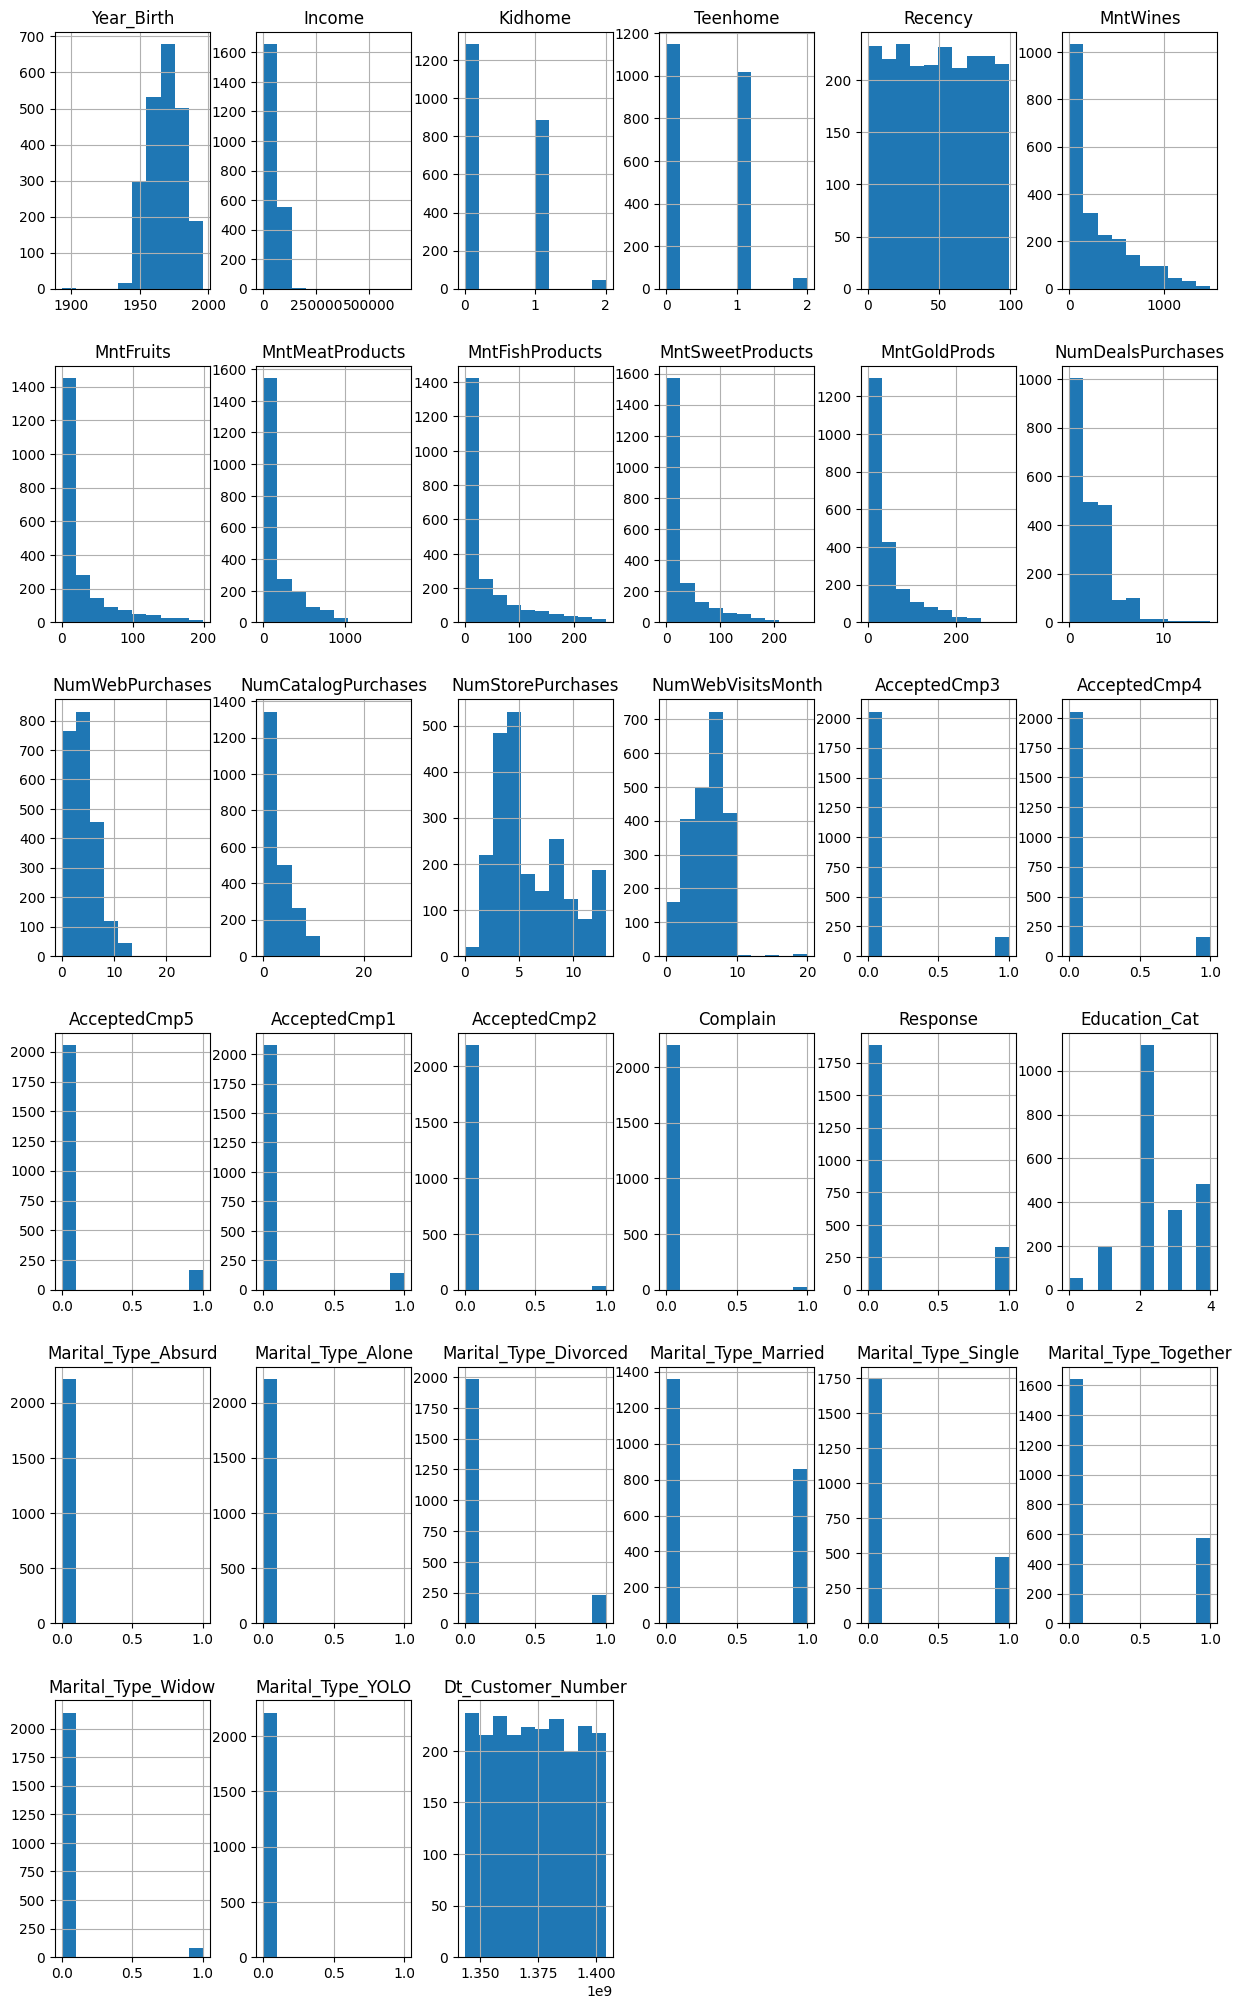

In [15]:
df_4.hist(figsize=(15, 25))
plt.show()

Notes:
To the best of my knowledge, was not found any new insight looking at the histograms above

### 4.2 Multivariate Plot


Notes:
- Year_Birth, **Income**, **MntWines**, **MntMeat**, **MntFish**, **MntSweet**, **MntGold**, **NumCatalog**, **NumWeb**, **AcceptedCmp[1-5]**, **Education**, **Alone**, **Divorced**, **Single**, **Widow**, **Absurd** was higher for **Response = 1**
- **Kidhome**, **Teenhome**, **Recency**, **Maried**, **Together** was higher for **Response = 0**
- OBS: for the Num.* columns, NumWebPurchases, NumCatalogPurchases, NumStorePurchases have the most significant diff (>0.15)

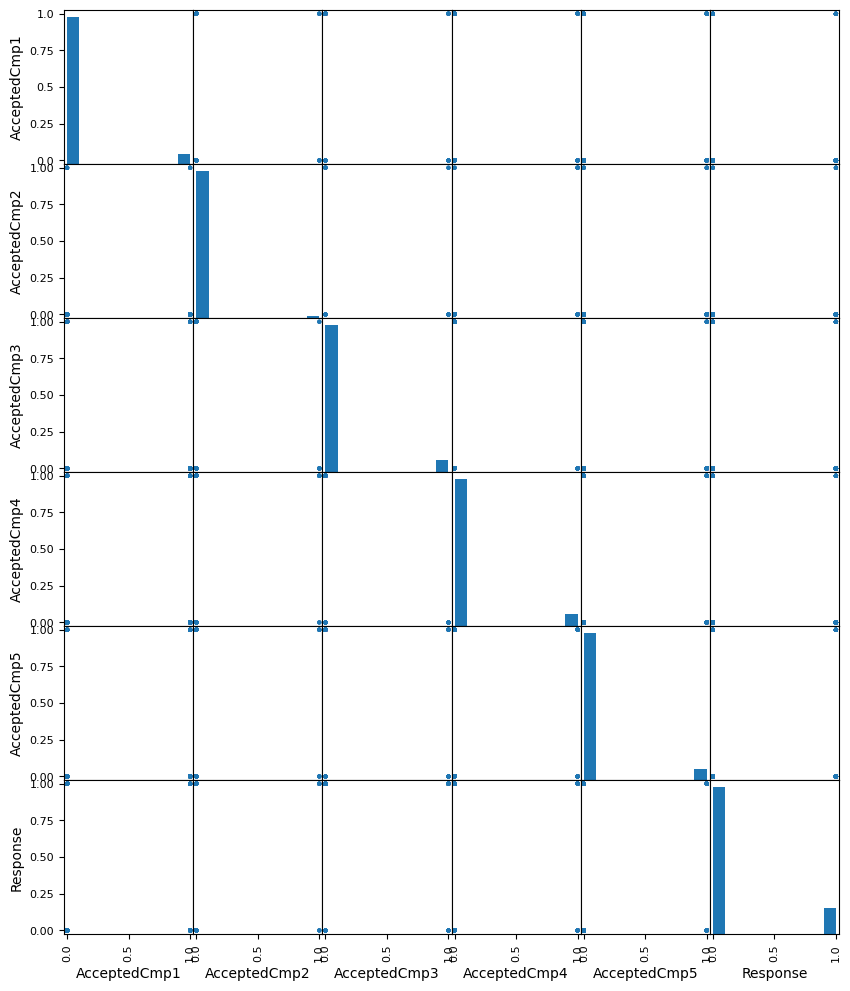

In [16]:

df_4_2 = df_4.copy()
df_4_2 = df_4_2.loc[:, ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
scatter_matrix(df_4_2, figsize=(10, 12))
plt.show()

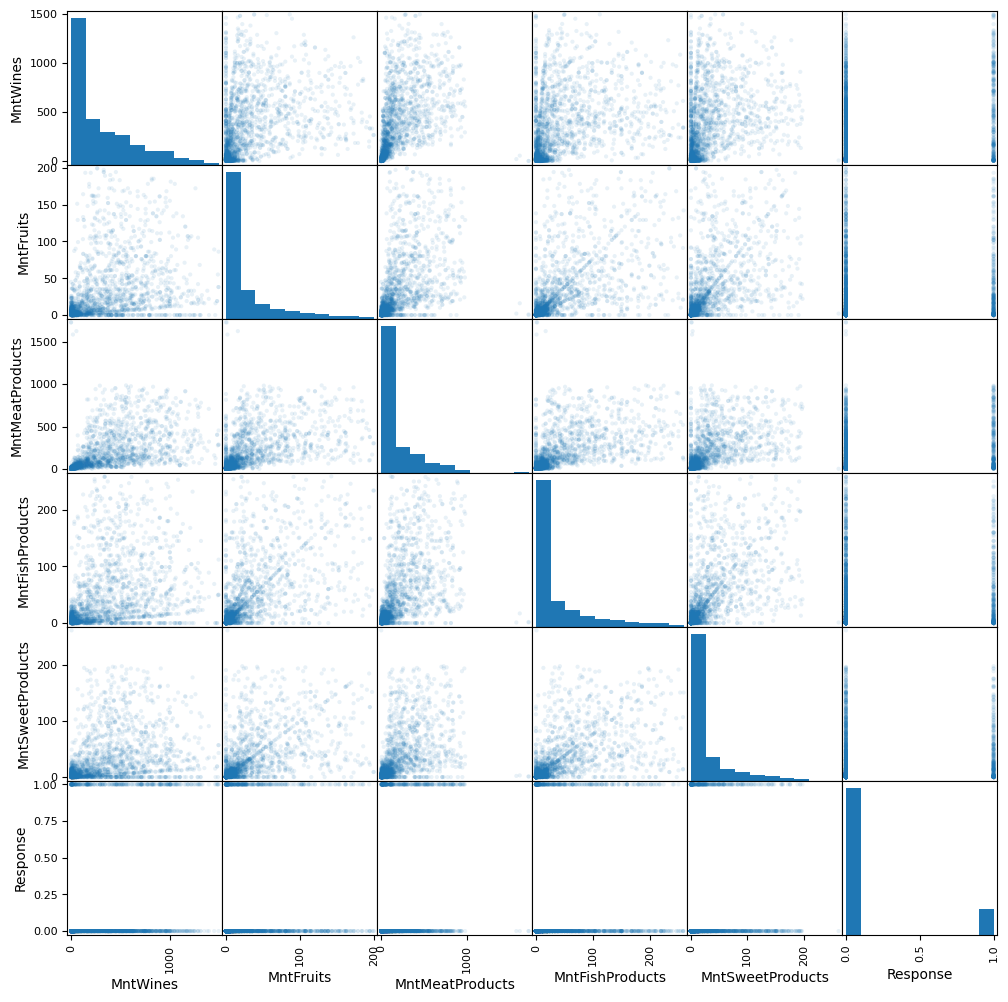

In [17]:

df_4_2 = df_4.copy()
df_4_2 = df_4_2.loc[:, ['MntWines', 'MntFruits',
                        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'Response']]
scatter_matrix(df_4_2, figsize=(12, 12),alpha=0.1)
plt.show()

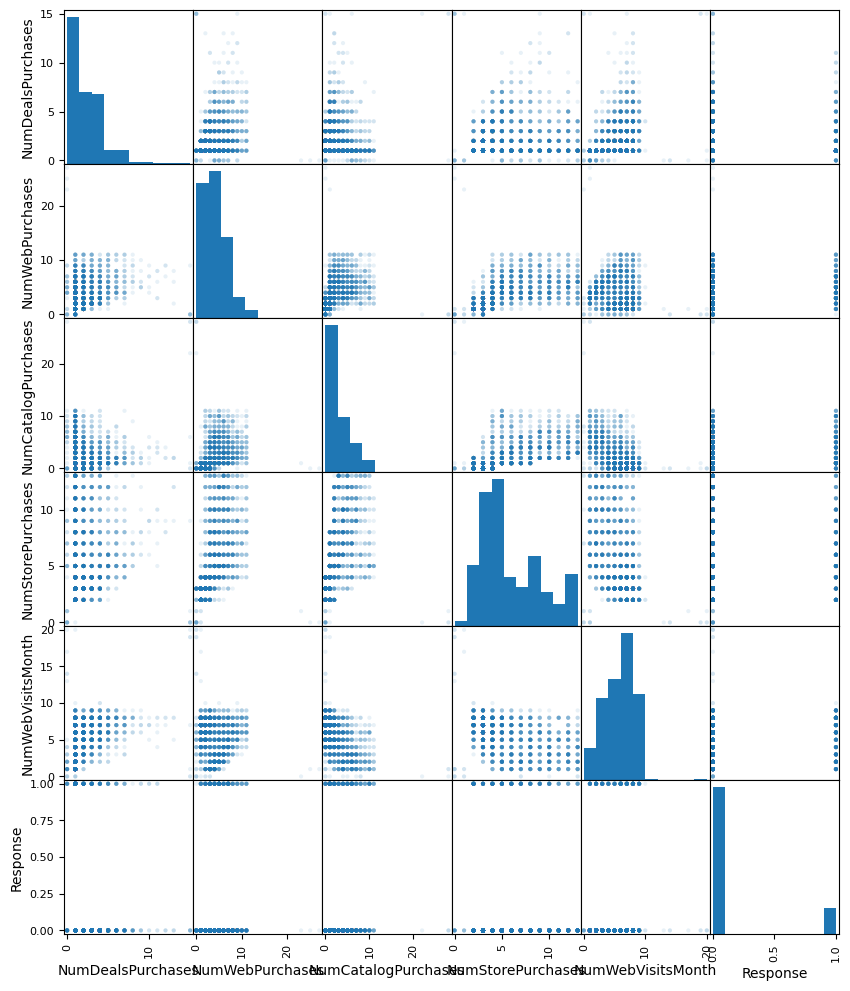

In [18]:

df_4_2 = df_4.copy()
df_4_2 = df_4_2.loc[:, ['NumDealsPurchases', 'NumWebPurchases',
                        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response']]
scatter_matrix(df_4_2, figsize=(10, 12),alpha=0.1)
plt.show()

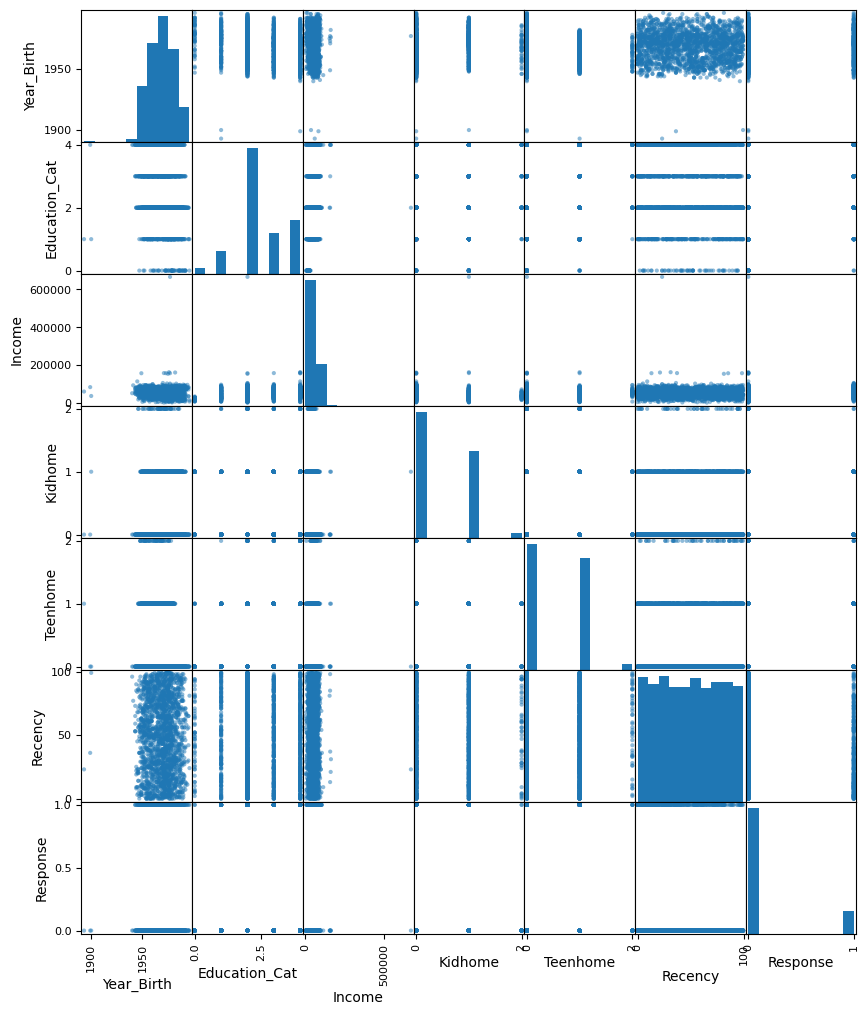

In [19]:

df_4_2 = df_4.copy()
df_4_2 = df_4_2.loc[:, ['Year_Birth', 'Education_Cat', 'Income', 'Kidhome',
                        'Teenhome', 'Dt_Customer', 'Recency', 'Response']]
scatter_matrix(df_4_2, figsize=(10, 12))
plt.show()

Notes:
- Can be said that Higher Wine and Meet, higher the chance that is a positive costumer
- Can be said that higher fish, higher fruits and wine
- Can be said that higher wine, higher meat and sweets
- Can be said that lower the store purchases, higher the chance that is a negative costumer

### 4.3 Confirming notes above using corr()

In [20]:
corr = df_pp.corr()
corr

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Cat,Marital_Type_Absurd,Marital_Type_Alone,Marital_Type_Divorced,Marital_Type_Married,Marital_Type_Single,Marital_Type_Together,Marital_Type_Widow,Marital_Type_YOLO,Dt_Customer_Number
ID,1.000000,0.002355,0.013095,0.001736,-0.003030,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,...,-0.003574,0.004285,-0.032414,-0.016978,0.011160,-0.015886,0.007168,0.022663,0.002074,0.002175
Year_Birth,0.002355,1.000000,-0.161791,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,...,-0.184809,0.015500,0.012842,-0.072614,0.049561,0.119262,-0.052903,-0.158168,0.010483,-0.020305
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,0.149338,0.024026,-0.012374,0.007975,-0.016479,-0.025843,0.023425,0.031706,-0.004556,0.018531
Kidhome,0.001736,0.233615,-0.428669,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,...,-0.053710,-0.024737,0.038289,-0.017834,0.017933,0.014217,0.009324,-0.071952,-0.024737,0.054583
Teenhome,-0.003030,-0.350791,0.019133,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,...,0.137042,-0.027921,0.010913,0.053489,0.008276,-0.099447,0.025379,0.048258,0.027323,-0.018144
Recency,-0.044376,-0.016295,-0.003970,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,...,-0.013858,0.004141,-0.023763,0.005606,-0.019268,0.003356,0.019933,-0.001367,-0.047783,-0.025963
MntWines,-0.021084,-0.159451,0.578650,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,...,0.215037,0.004492,-0.013147,0.020029,-0.012330,-0.021198,0.005799,0.034667,0.001507,-0.168049
MntFruits,0.007326,-0.017747,0.430842,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,...,-0.076176,0.043925,-0.020689,0.009203,-0.014117,0.011819,-0.012694,0.026111,-0.017644,-0.067958
MntMeatProducts,-0.005902,-0.033697,0.584633,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,...,0.048746,0.019503,-0.023097,-0.025604,-0.021602,0.041365,-0.001446,0.015408,-0.015682,-0.089577
MntFishProducts,-0.023992,-0.040425,0.438871,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,...,-0.102180,0.092167,-0.020159,-0.016208,-0.031493,0.010774,0.015375,0.042243,-0.018469,-0.081834


TODO:
1. Ver quais são as features mais correlacionadas ao Response
2. Ver quais features são mais correlacionadas as features que são correlacionadas ao Response

Notes:
Analyzing the correlation, a new feature was found relevant: Dt_Customer_Number

## 5. Classification metodologies

### Packages

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns


### Functions

In [44]:
def evaluateModels(X_train, y_train, models, n_splits):
    print(f"{n_splits}-Fold Cross validation")
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print(f"{name}: Mean Accuracy={cv_results.mean():.5f}, Standard Deviation={cv_results.std():.5f}")

In [84]:
class Models:
    def __init__(self, X_train, X_test , y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def logistic_regression(self):
        print("Logistic Regression")
        self.name = 'Logistic Regression'
        self.classifier = LogisticRegression(solver='liblinear', multi_class='ovr')
        self.classifier.fit(self.X_train, self.y_train)
        self.y_pred = self.classifier.predict(self.X_test)

    def svm(self):
        self.name = 'SVM'
        print("SVM")
        # self.classifier = SVC(C=1.0, kernel='linear', degree=3, gamma='auto',random_state=0)
        self.classifier = SVC(gamma='auto')

        self.classifier.fit(self.X_train, self.y_train)
        self.y_pred = self.classifier.predict(self.X_test)

    def k_neighbors(self, n_neighbors):
        self.name = 'K Neighbors'
        print("KNN, n_neighbors = {}".format(n_neighbors))
        # self.classifier = KNeighborsClassifier(n_neighbors=5, metric='cosine', p=2)
        self.classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean')

        self.classifier.fit(self.X_train, self.y_train)
        self.y_pred = self.classifier.predict(self.X_test)

    def score(self, type='cr'):
        self.score1 = accuracy_score(self.y_test, self.y_pred)
        self.score2 = precision_score(self.y_test, self.y_pred)
        self.score3 = recall_score(self.y_test, self.y_pred)
        self.score4 = f1_score(self.y_test, self.y_pred)
        self.cm = confusion_matrix(self.y_test, self.y_pred)

        if (type == 'scores'):

            print("---- Scores ----")
            print("Accuracy score is: {}%".format(round(self.score1 * 100, 2)))
            print("Precision score is: {}".format(round(self.score2 * 100, 2)))
            print("Recall score is: {}".format(round(self.score3 * 100, 2)))
            print("F1 score is: {}".format(round(self.score4 * 100, 2)))
        elif (type == 'cr'):
            print("---- Classification Report ----")
            print(classification_report(self.y_test, self.y_pred))

        elif (type == 'cm'):
            print("---- Confusion Matrix ----")

            self.show_confusion_matrix()

    def show_confusion_matrix(self):
        print("Confusion Matrix")
        plt.figure(figsize=(5, 5))

        sns.heatmap(self.cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
                    yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Truth')
        plt.title('Confusion Matrix')
        plt.show()

### Metodology 1
- Use features more correlated with target Response for training

#### Preparing data for input to model

Get column names more correlated to Response (abs >= 0.1)

In [23]:
# get columns more correlated
df_more_corr = corr.loc[abs(corr['Response']) >= 0.09]
columns_more_corr = df_more_corr.index.tolist()
# create dataframe with these columns
df_m1 = df_pp[columns_more_corr]

# put response column at the end of df to make easier the conversion for numpy (numpy matrix is better than dataframe as input for models)
df_columns = [col for col in df_m1.columns if col != 'Response']
df_columns.insert(len(df_m1), 'Response')
df_m1 = df_m1[df_columns]


In [24]:
# Split array into features and target label
m1_array = df_m1.values
X = m1_array[:, :-1]
y = m1_array[:, -1]

In [25]:
# normalize features
ss = MinMaxScaler()
X = ss.fit_transform(X)

Notes:
Was decided to use the MinMaxScaler normalization because the models had of 2% increase of accuracy in comparison to not using any kind of normalization

This normnaization maps each column to a range of 0 to 1, based on the max value of the columns and the minimum value of the column to decide the final value

In [26]:
# split into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=2)

#### Evaluating models

In [42]:
# evaluating models

models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))


evaluateModels(X_train,y_train, models, 10)


10-Fold Cross validation
LR: Mean Accuracy=0.89107, Standard Deviation=0.01369
KNN: Mean Accuracy=0.86341, Standard Deviation=0.01648
CART: Mean Accuracy=0.83917, Standard Deviation=0.01752
SVM: Mean Accuracy=0.87358, Standard Deviation=0.00738


#### Predictions
- Now that the best models was evaluated, it is time to test it on unseen data

In [75]:
models = Models(X_train, X_test, y_train, y_test)
models.logistic_regression()
models.score()
models.show_confusion_matrix()

In [62]:
models.svm()
models.score()
models.cm

SVM
---- Classification Report ----
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       376
         1.0       0.76      0.38      0.51        68

    accuracy                           0.89       444
   macro avg       0.83      0.68      0.72       444
weighted avg       0.88      0.89      0.87       444



Notes:
LR and SVM were the best models for StratifiedKfold and 0.8 of train_size, with 0.862 and 0.850 of accuracy, respectively

### Metodology 2
- Use all features for training

#### Preparing data for input to model

In [30]:
df_m2 = df_pp.copy()
df_m2.drop(columns=['Education', 'Marital_Status','Dt_Customer','Z_Revenue','Z_CostContact'], inplace=True)


In [31]:
df_columns = [col for col in df_m2.columns if col != 'Response']
df_columns.insert(len(df_m2), 'Response')
df_m2 = df_m2[df_columns]


In [32]:
m2_array = df_m2.values
X = m2_array[:, :-1]
y = m2_array[:, -1]

In [33]:
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
X = ss.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=2)

#### Evaluating models

In [76]:
models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))

evaluateModels(X_train, y_train, models, 10)

10-Fold Cross validation
LR: Mean Accuracy=0.89107, Standard Deviation=0.01369
KNN: Mean Accuracy=0.86341, Standard Deviation=0.01648
CART: Mean Accuracy=0.83354, Standard Deviation=0.01989
SVM: Mean Accuracy=0.87358, Standard Deviation=0.00738


Notes:
LR was the best model using StratifiedKfold and 80/20 train_test_split, with 0,89107 of accuracy

Due to the fact that LR got the best results, it will be used for the final test: use the model for unseen data (test_split)

#### Predictions
- Now that the best models was evaluated, it is time to test it on unseen data


Logistic Regression
---- Classification Report ----
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       376
         1.0       0.75      0.40      0.52        68

    accuracy                           0.89       444
   macro avg       0.82      0.69      0.73       444
weighted avg       0.88      0.89      0.87       444

Confusion Matrix


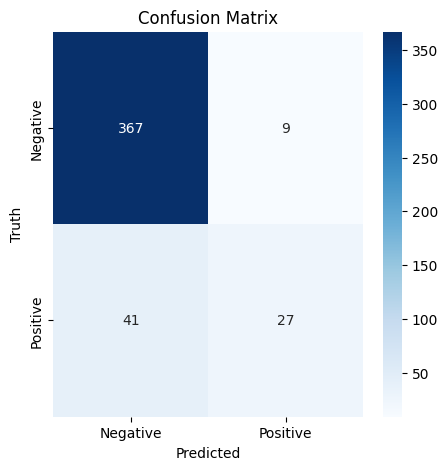

In [86]:
models = Models(X_train, X_test, y_train, y_test)
models.logistic_regression()
models.score()
models.show_confusion_matrix()

## 6. Conclusion

## 7. References
https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
https://towardsdatascience.com/data-exploration-and-analysis-using-python-e564473d7607
https://medium.com/ml-research-lab/chapter-4-knowledge-from-the-data-and-data-exploration-analysis-99a734792733
Data Science Do Zero: Noções Fundamentais com Python, 2021 - Joel Grus